<a href="https://colab.research.google.com/github/QuesitoCode/Parcial2AD/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos el dataset e imprimimos los datos de la cabecera para verificar que se hiizo una correcta importación 
import pandas as pd
dataset = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
dataset.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# 1. Realizar gráficas de dispersión entre variables para entender un poco la relación entre ellas.

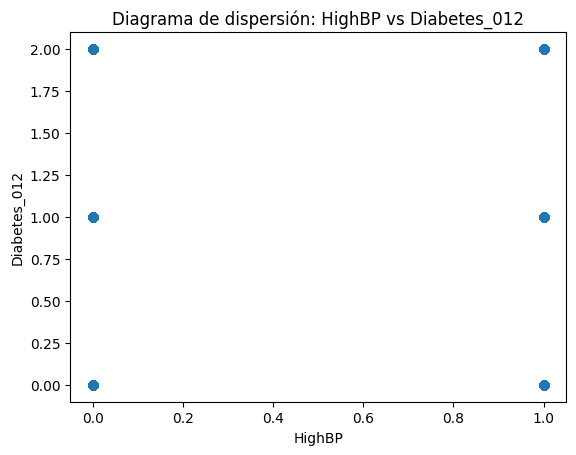

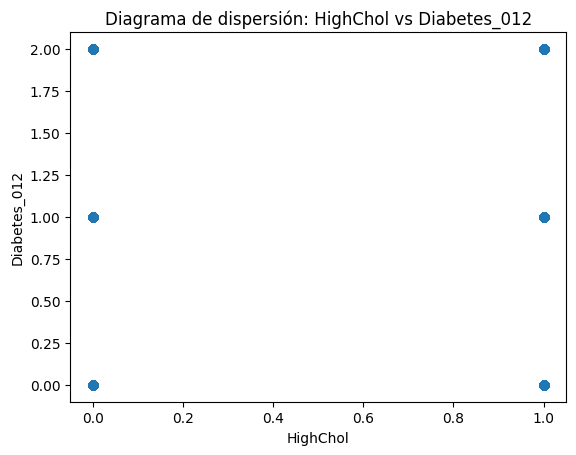

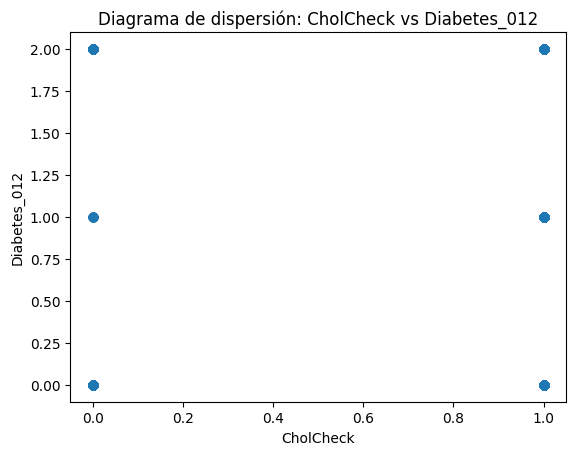

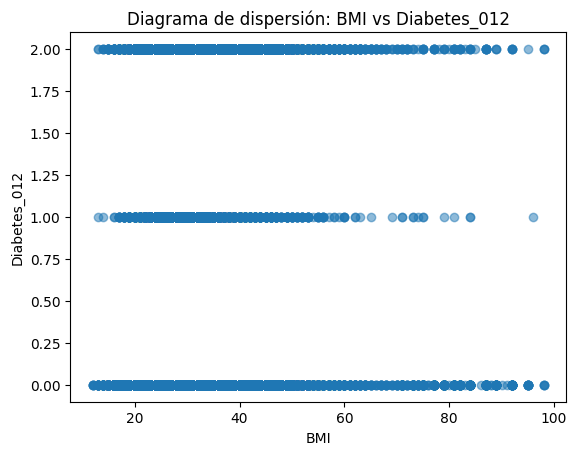

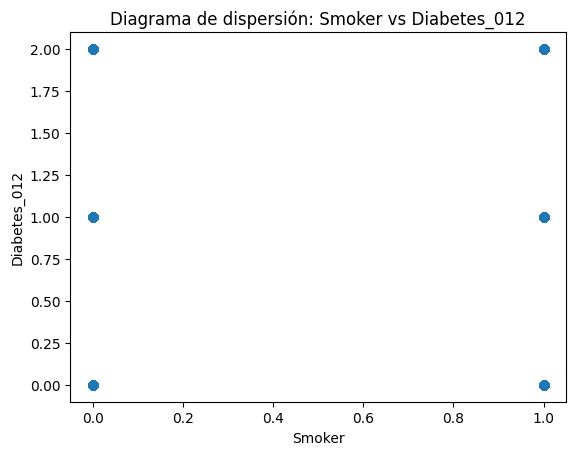

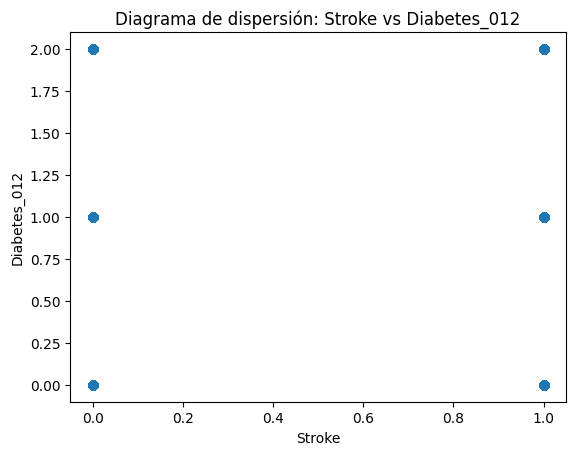

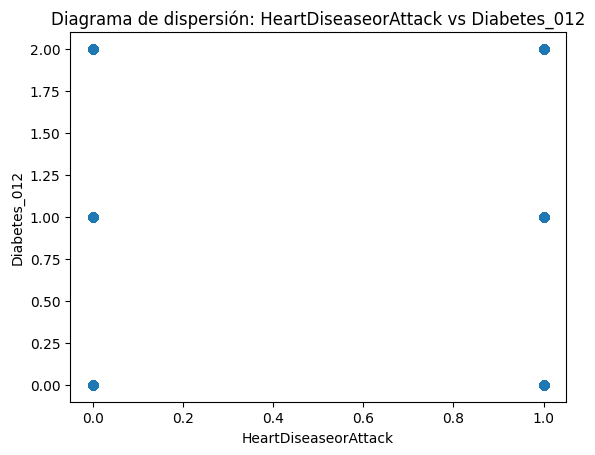

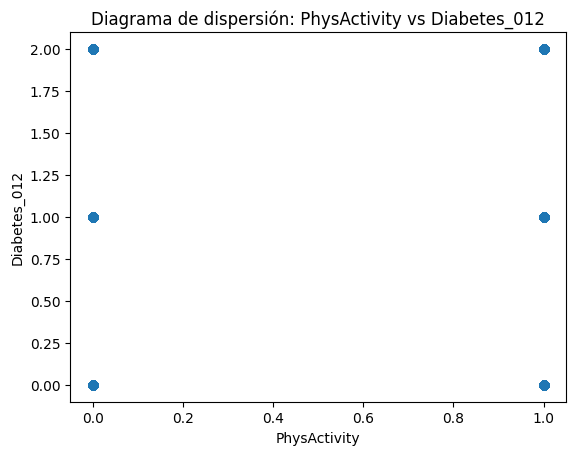

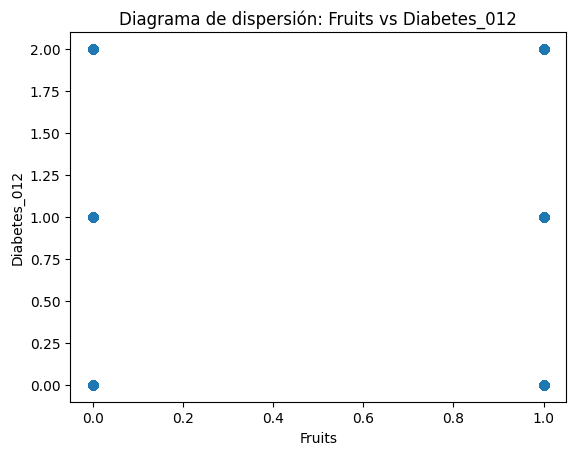

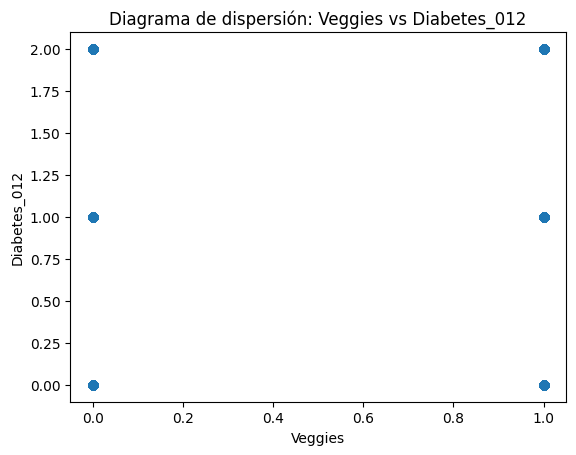

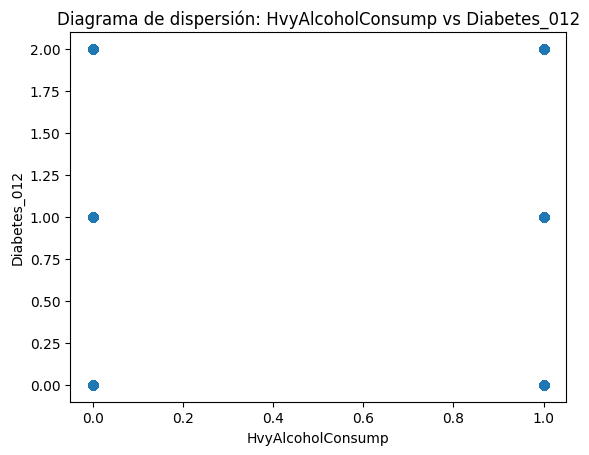

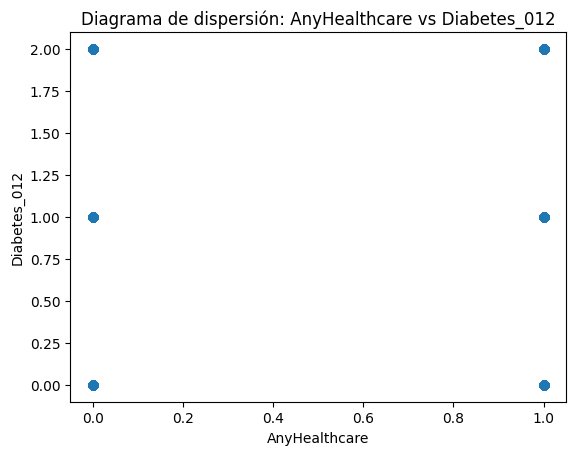

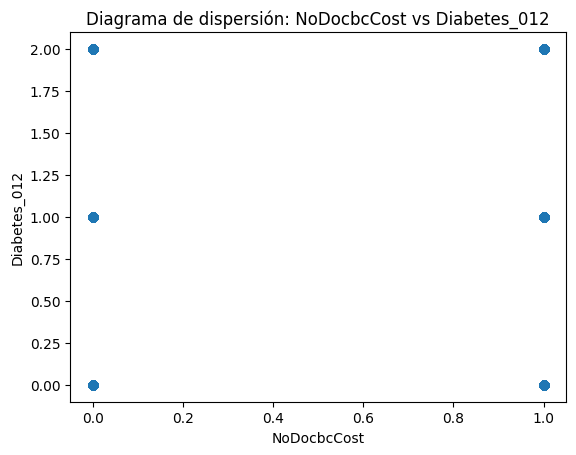

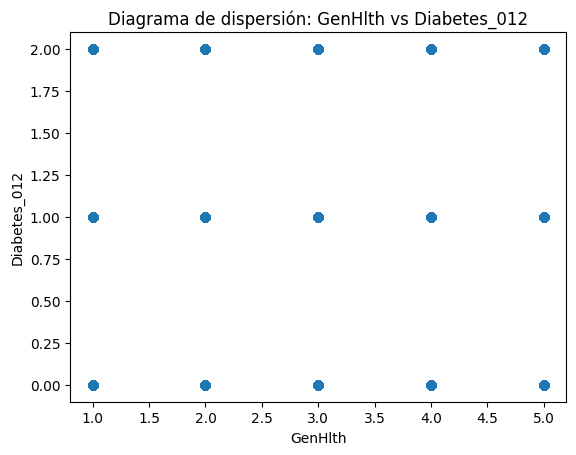

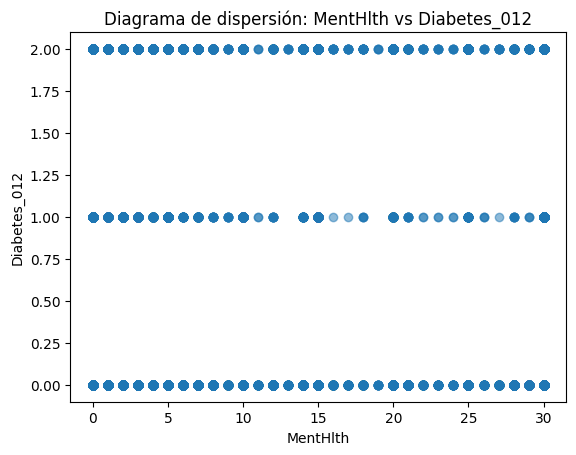

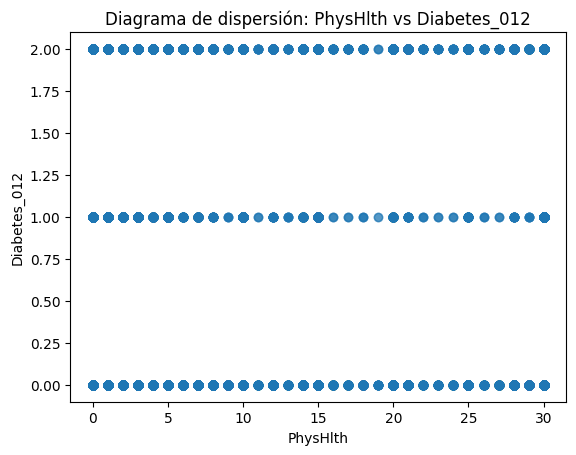

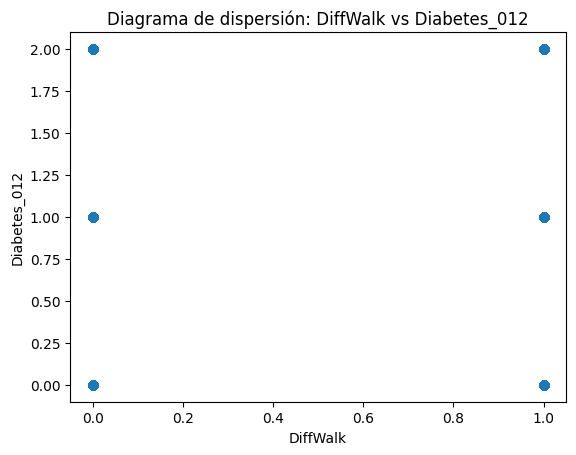

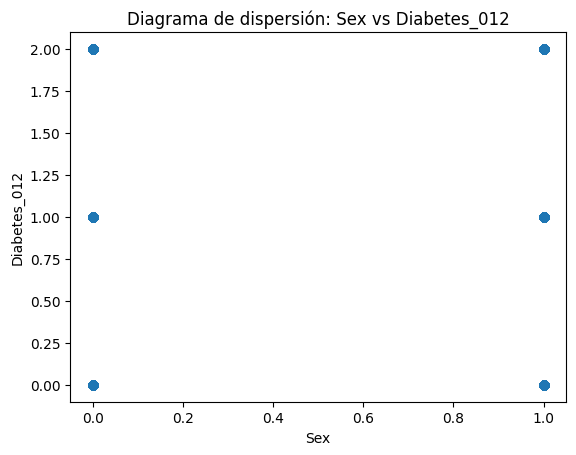

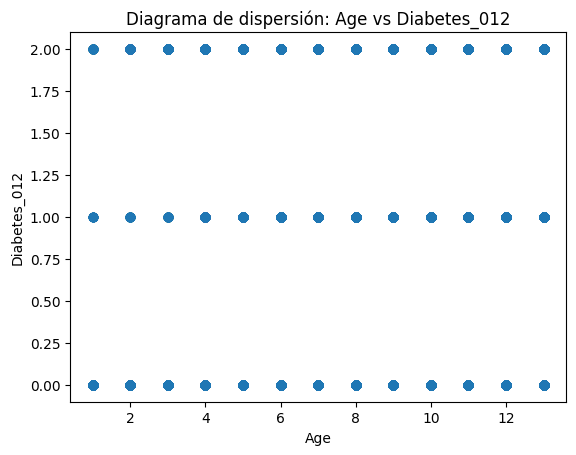

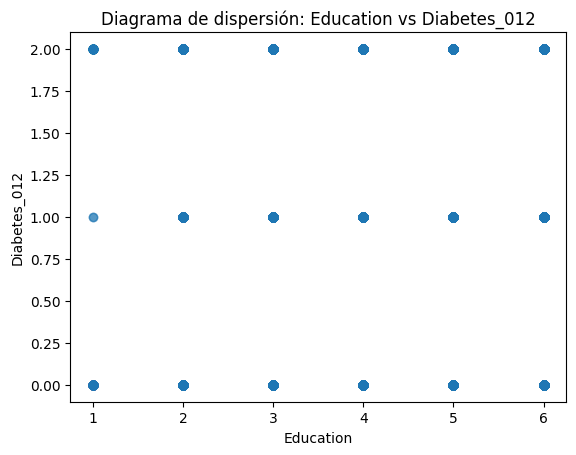

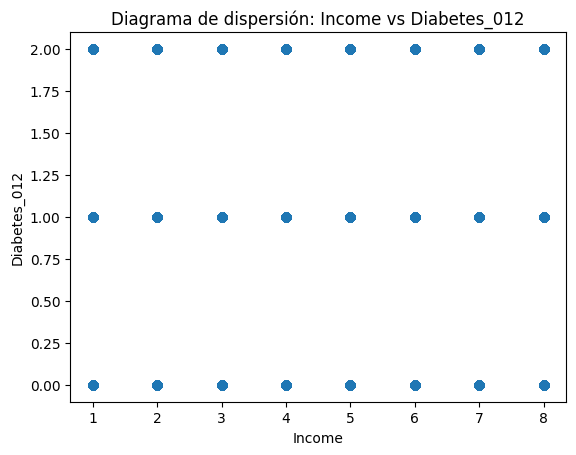

In [2]:
import matplotlib.pyplot as plt

#Obtenemos las columnas del dataset

columns = dataset.columns

# Crear los gráficos de dispersión a partir de la primera variable con respecto a las otras disponibles para hacernos una idea de la disperisón existente entre cada una de los datos importados
# Así encontrando valores atipicos y la correlación que puede existir entre estos 

for column in columns:
  if(column == 'Diabetes_012'):
    continue
  plt.scatter(dataset[column], dataset['Diabetes_012'], alpha=0.5)
  plt.xlabel(column)
  plt.ylabel('Diabetes_012')
  plt.title(f'Diagrama de dispersión: {column} vs Diabetes_012')
  plt.show()

# 2. Calcular la matriz de correlación del conjunto de datos original.

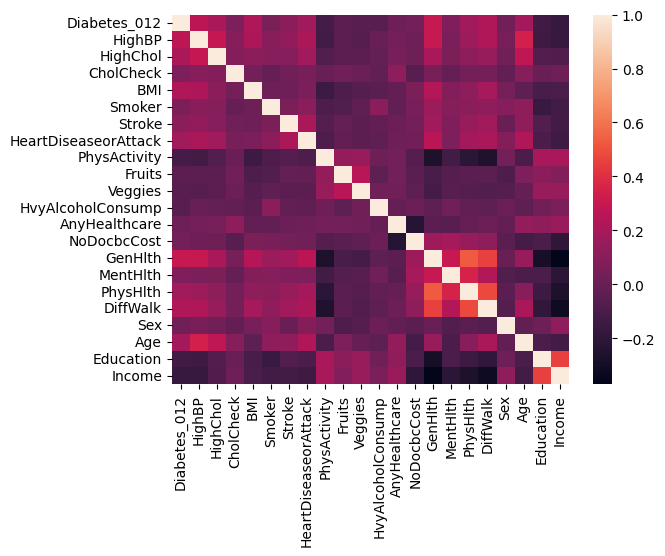

In [3]:
# Calculamos la matriz de correlación y generamos un mapa de calor utilizando la librería seaborn
# Esta proporciona una medida cuantitatica de la relación entre pares de variables, lo que nos permite 
# Seleccionar los datos con la caracteristicas más relevantes para ahcer un modelo predictivo o reealizar
# Un analisis posterior.
import seaborn as sns
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix)
plt.show()

# 3. Estadísticos de cada columna como lo son la media, mediana, moda, kurtosis y asimetría. Mencionar en base de estos valores si dicha variable o columna tiene tendencia de ser una distribución normal o no.

In [4]:
statistics = dataset.describe()
mode = dataset.mode().iloc[0]
#La función "describe" nos mostrará los datos estadisticos principales, para poder realizar el analisis estadistico simple sobre cada variable.
#Ademas de esto agregamos la Mediana, kurtosis y asimetría, que son los analisis estadisticos faltantes para este.
statistics.loc['median'] = dataset.median()
statistics.loc['kurtosis'] = dataset.kurtosis()
statistics.loc['skewness'] = dataset.skew()

print(statistics)
print("\nModa:\n", mode)

           Diabetes_012         HighBP       HighChol      CholCheck  \
count     253680.000000  253680.000000  253680.000000  253680.000000   
mean           0.296921       0.429001       0.424121       0.962670   
std            0.698160       0.494934       0.494210       0.189571   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       1.000000   
50%            0.000000       0.000000       0.000000       1.000000   
75%            0.000000       1.000000       1.000000       1.000000   
max            2.000000       1.000000       1.000000       1.000000   
median         0.000000       0.000000       0.000000       1.000000   
kurtosis       1.980148      -1.917701      -1.905720      21.826983   
skewness       1.976390       0.286904       0.307075      -4.881271   

                    BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count     253680.000000  253680.000000  253680.000000   

Con la kurtosis medimos una variable aleatoria, por lo general, los resultados que tienen una mayor frecuencia son los que se sitúan en torno a la media de la distribución. Existen algunas variables que presentan un mayor grado de concentración (menor dispersión) de los valores en torno a su media y otras, por el contrario, presentan un menor grado de concentración (mayor dispersión) de sus valores en torno a su valor central. Por tanto, la curtosis nos informa de lo apuntada (mayor concentración) o lo achatada (menor concentración) que es una distribución.

La asimetría (skewness) mide la simetría de la distribución.

*   Asimetría positiva: También conocida como sesgo hacia la derecha, indica que la cola de la distribución se extiende hacia la derecha y la mayoría de los valores se concentran hacia la izquierda de la media.

*   Asimetría negativa: También conocida como sesgo hacia la izquierda, indica que la cola de la distribución se extiende hacia la izquierda y la mayoría de los valores se concentran hacia la derecha de la media.

*   Asimetría cero: Indica que la distribución es simétrica, es decir, los valores están igualmente distribuidos a ambos lados de la media.



Basándonos en lo anterior podemos inferir que las columnas que tienen tendencia de ser una distribución normal son:


*   PhysActivity
*   GenHlth
*   Age
*   Education
*   Income







# 4. Generar dos datasets, uno con valores atípicos y otro sin ellos. Los dos se utilizarán para entrenar modelos.


In [5]:
columns = dataset.columns

# Creamos un nuevo data set sin los atipicos para poder realizar un analisis aislado y evitar datos que pueden dañar el estudio

dataset_no_outliers = dataset
for i in columns[2:]:
  Q1 = dataset[i].quantile(0.25)
  Q3 = dataset[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.55 * IQR
  l_limit_h = Q1 - 1.55 * IQR
  atp = dataset_no_outliers[(dataset_no_outliers[i] < l_limit_h) | (dataset_no_outliers[i] > u_limit_h)].index
  dataset_no_outliers = dataset_no_outliers.drop(atp) 

print('La cantidad de registros en el nuevo dataframe es:',dataset_no_outliers.shape[0])
dataset_no_outliers

df_registrosatp = pd.DataFrame()
for i in columns[2:]:
  Q1 = dataset[i].quantile(0.25)
  Q3 = dataset[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.55 * IQR
  l_limit_h = Q1 - 1.55 * IQR
  atp = (dataset[i] < l_limit_h) | (dataset[i] > u_limit_h) # Registro con dato atípico
  df_registrosatp = pd.concat([df_registrosatp,dataset[atp]],ignore_index=True) 
  
# Con este data set revisamos cuantos datos atipicos eleminamos sobre el data set original

df_registrosatp=df_registrosatp.drop_duplicates() 
print('Existen',df_registrosatp.shape[0],'registros con datos atípicos')

La cantidad de registros en el nuevo dataframe es: 94210
Existen 157537 registros con datos atípicos


# 5. Calcular la matriz de correlación del conjunto sin atípicos.

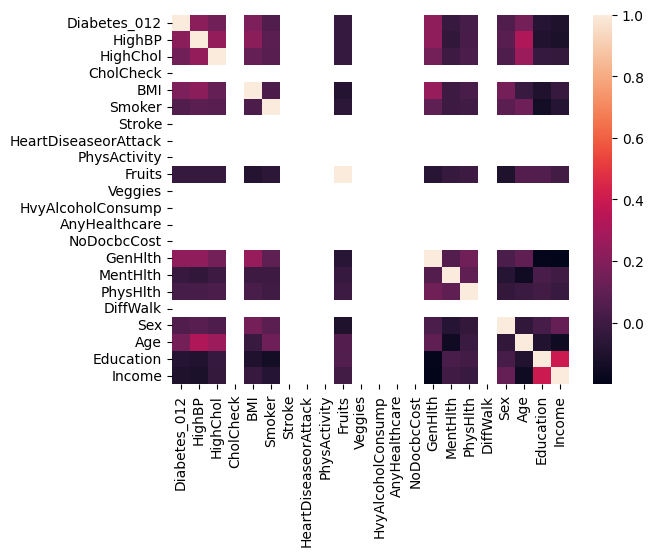

In [6]:
#Realizamos un nuevo analisis por medio de una matriz de correlación sin los datos atipicos para tener un criterio más centrado sobre que variables son las mas utiles para realizar los modelos

correlation_matrix_no_outliers = dataset_no_outliers.corr()
sns.heatmap(correlation_matrix_no_outliers)
plt.show()

# 6 Los modelos por entrenar tienen que ser validados por medio de una validación cruzada con K igual a 7, 9 y 11. SE DEBE GARANTIZAR LA HOMOGENEIDAD DE LOS DATOS AL MOMENTO DE REALIZAR LA VALIDACIÓN CRUZADA.

In [7]:
# Importamos las librerías necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

Relizo una función para entrenar los diferentes modelos por algoritmo, realizar validación cruzada con k=5, k=7 y k=9 e imprimir la curva ROC para cada uno de los modelos

In [8]:
# Se raliza una función para la validación cruzada

def evaluate_model(models, X_train, X_test, y_train, y_test, classes):
  k_values = [7, 9, 11]
  for model, columns, model_name in models:
    print(f"#######################################  Modelo: {model_name}, Columnas: {columns} #############################")
    for k in k_values:
      print(f"Validación cruzada con k={k}")
      scores = cross_val_score(model, X_train[columns], y_train, cv=k)
      print("Precisión promedio:", scores.mean())

      min_max_scaler=MinMaxScaler()
      X_train_norm=min_max_scaler.fit_transform(X_train)
      X_test_norm=min_max_scaler.fit_transform(X_test)

      #Datos de entrenamiento
      model.fit(X_train[columns], y_train)

      #Datos de prueba
      y_pred = model.predict(X_test[columns])

      print("Matriz de confusión:")
      print(confusion_matrix(y_test, y_pred))

      print("Sensibilidad:", recall_score(y_test, y_pred, average='macro'))
      print("Precisión:", precision_score(y_test, y_pred, average='macro'))
      print("Especificidad:", recall_score(y_test, y_pred, pos_label=0, average='macro'))
      print()

    #Curva de roc para cada modelo que se evalue dentro de este
    RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
    RF.fit(X_train_norm,y_train)
    y_pred =RF.predict(X_test_norm)
    pred_prob = RF.predict_proba(X_test_norm)
    y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()

    n_class = classes.shape[0]

    for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
      roc_auc[i] = auc(fpr[i], tpr[i])

      # Graficamos la curva de roc   
      plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    print(f"------------------- Curva ROC para el modelo {model_name} con columnas {columns} -------------------")
    plt.title('Curva ROC multiclase')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()


Se utilizará los algoritmos de clasificación: "Arbol de decisión", "KNN", "Redes Neuronales".

> Con los parametros solicitados dentro de el parcial "4 modelos 7 variables cada modelo"




Dividiré el conjunto de datos en características (X) y la variable objetivo (y). 
En este caso, la variable objetivo es 'Diabetes_012' y las características son las otras columnas del dataset.

In [9]:
from sklearn.preprocessing import LabelEncoder

# División del dataset en conjuntos de entrenamiento y prueba donde el 20% de los datos son de prueba
X = dataset_no_outliers.drop('Diabetes_012', axis=1)
y = dataset_no_outliers['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

*  Árbol de decisión

#######################################  Modelo: Árbol de decisión, Columnas: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'] #############################
Validación cruzada con k=7
Precisión promedio: 0.8769238540387116
Matriz de confusión:
[[16523   107   617]
 [  185     2    29]
 [ 1178    22   179]]
Sensibilidad: 0.3656950500454366
Precisión: 0.38534400652819856
Especificidad: 0.3656950500454366

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.87648605947256
Matriz de confusión:
[[16540   107   600]
 [  186     2    28]
 [ 1176    25   178]]
Sensibilidad: 0.36578188854778415
Precisión: 0.38656272025785504
Especificidad: 0.36578188854778415

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.8779719869164798
Matriz de confusión:
[[16544   108   595]
 [  183     2    31]
 [ 1177    22   180]]
Sensibilidad: 0.3663426387864744
Precisión: 0.38750529933613914
Especificidad: 0.3663426387864744



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'] -------------------


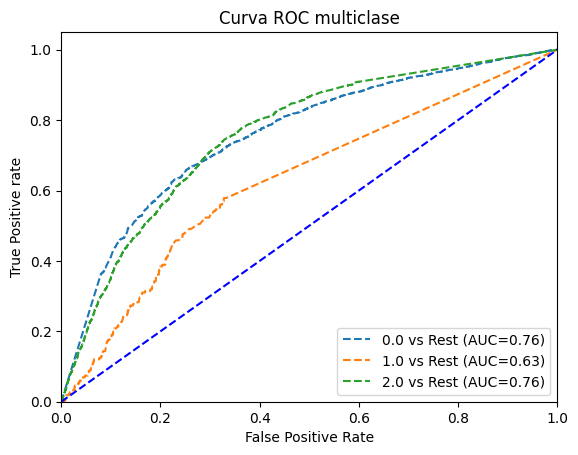

#######################################  Modelo: Árbol de decisión, Columnas: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9077459920166341
Matriz de confusión:
[[17245     0     2]
 [  216     0     0]
 [ 1377     0     2]]
Sensibilidad: 0.33377812137569957
Precisión: 0.4718122942987579
Especificidad: 0.33377812137569957

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9078255993339569
Matriz de confusión:
[[17245     0     2]
 [  216     0     0]
 [ 1377     0     2]]
Sensibilidad: 0.33377812137569957
Precisión: 0.4718122942987579
Especificidad: 0.33377812137569957

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9077990652860136
Matriz de confusión:
[[17245     0     2]
 [  216     0     0]
 [ 1377     0     2]]
Sensibilidad: 0.33377812137569957
Precisión: 0.4718122942987579
Especificidad: 0.33377812137569957



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'] -------------------


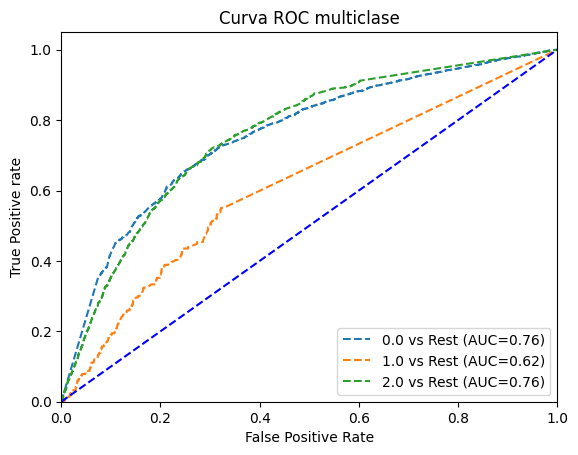

#######################################  Modelo: Árbol de decisión, Columnas: ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9079715538728352
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9079715537431068
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9079715566853217
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'] -------------------


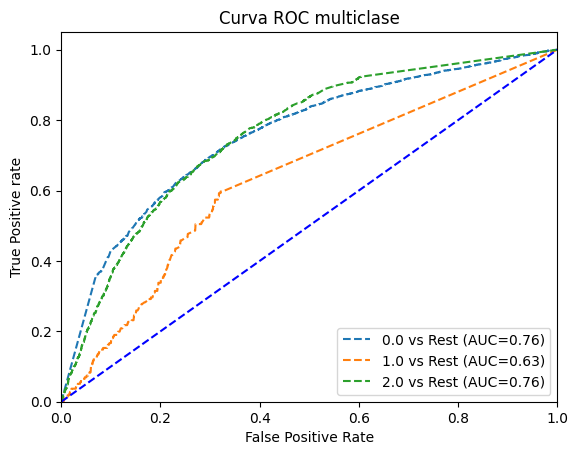

#######################################  Modelo: Árbol de decisión, Columnas: ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'] #############################
Validación cruzada con k=7
Precisión promedio: 0.8933101416712479
Matriz de confusión:
[[16904    45   298]
 [  202     2    12]
 [ 1263    16   100]]
Sensibilidad: 0.3539626862536107
Precisión: 0.3986315125044347
Especificidad: 0.3539626862536107

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.8939204986135321
Matriz de confusión:
[[16902    43   302]
 [  200     4    12]
 [ 1267    15    97]]
Sensibilidad: 0.3562852887795444
Precisión: 0.40688768301515554
Especificidad: 0.3562852887795444

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.8936286247430185
Matriz de confusión:
[[16895    47   305]
 [  201     3    12]
 [ 1266    15    98]]
Sensibilidad: 0.3548485107278603
Precisión: 0.4008017222173488
Especificidad: 0.3548485107278603



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'] -------------------


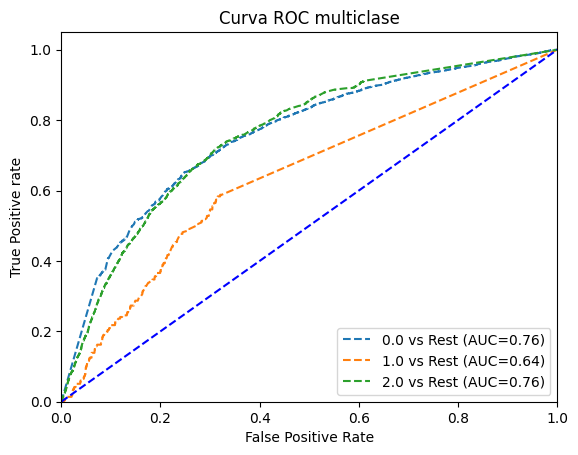

In [10]:
decision_tree = DecisionTreeClassifier()

# Se crean los modelos con diferentes conjuntos de características
models = [
    (decision_tree, ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], 'Árbol de decisión'),
    (decision_tree, ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'], 'Árbol de decisión'),
    (decision_tree, ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'], 'Árbol de decisión'),
    (decision_tree, ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'], 'Árbol de decisión')
]

evaluate_model(models, X_train, X_test, y_train, y_test, classes)

*  KNN

#######################################  Modelo: Árbol de decisión, Columnas: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9000504193465616
Matriz de confusión:
[[17036     3   208]
 [  203     0    13]
 [ 1293     0    86]]
Sensibilidad: 0.3500433400649991
Precisión: 0.3998016870428425
Especificidad: 0.3500433400649991

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9001300400315119
Matriz de confusión:
[[17036     3   208]
 [  203     0    13]
 [ 1293     0    86]]
Sensibilidad: 0.3500433400649991
Precisión: 0.3998016870428425
Especificidad: 0.3500433400649991

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.8999973162840333
Matriz de confusión:
[[17036     3   208]
 [  203     0    13]
 [ 1293     0    86]]
Sensibilidad: 0.3500433400649991
Precisión: 0.3998016870428425
Especificidad: 0.3500433400649991



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'] -------------------


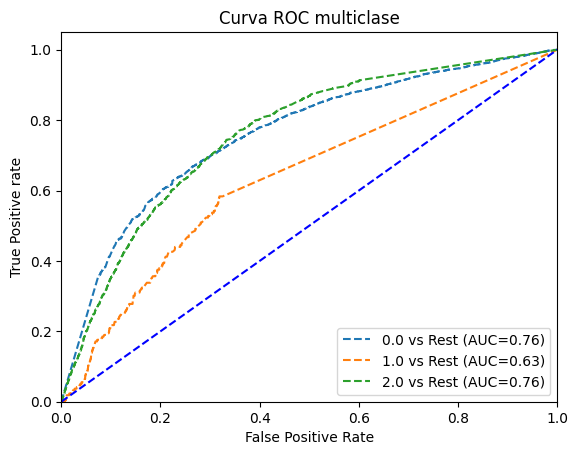

#######################################  Modelo: Árbol de decisión, Columnas: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9038451556468375
Matriz de confusión:
[[17103     0   144]
 [  202     0    14]
 [ 1338     0    41]]
Sensibilidad: 0.340460803831613
Precisión: 0.37447513991851294
Especificidad: 0.340460803831613

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9006342049801942
Matriz de confusión:
[[17103     0   144]
 [  202     0    14]
 [ 1338     0    41]]
Sensibilidad: 0.340460803831613
Precisión: 0.37447513991851294
Especificidad: 0.340460803831613

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9008994906501528
Matriz de confusión:
[[17103     0   144]
 [  202     0    14]
 [ 1338     0    41]]
Sensibilidad: 0.340460803831613
Precisión: 0.37447513991851294
Especificidad: 0.340460803831613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'] -------------------


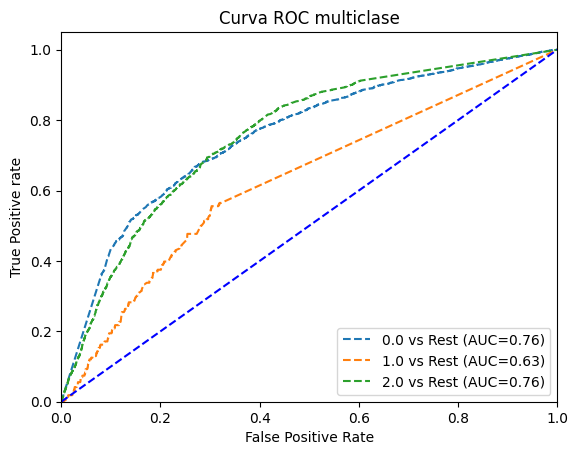

#######################################  Modelo: Árbol de decisión, Columnas: ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9074805902572198
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9070294843749568
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9049727936115212
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'] -------------------


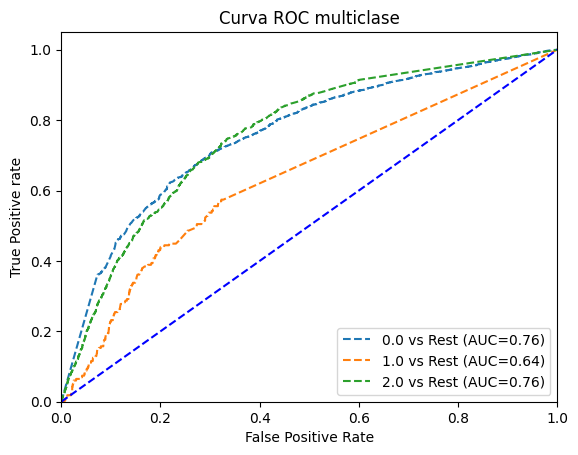

#######################################  Modelo: Árbol de decisión, Columnas: ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'] #############################
Validación cruzada con k=7
Precisión promedio: 0.8986306894507778
Matriz de confusión:
[[17025     1   221]
 [  203     0    13]
 [ 1280     0    99]]
Sensibilidad: 0.35297311640582113
Precisión: 0.40572326162341293
Especificidad: 0.35297311640582113

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.8995727500543617
Matriz de confusión:
[[17025     1   221]
 [  203     0    13]
 [ 1280     0    99]]
Sensibilidad: 0.35297311640582113
Precisión: 0.40572326162341293
Especificidad: 0.35297311640582113

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.8991614737401782
Matriz de confusión:
[[17025     1   221]
 [  203     0    13]
 [ 1280     0    99]]
Sensibilidad: 0.35297311640582113
Precisión: 0.40572326162341293
Especificidad: 0.35297311640582113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'] -------------------


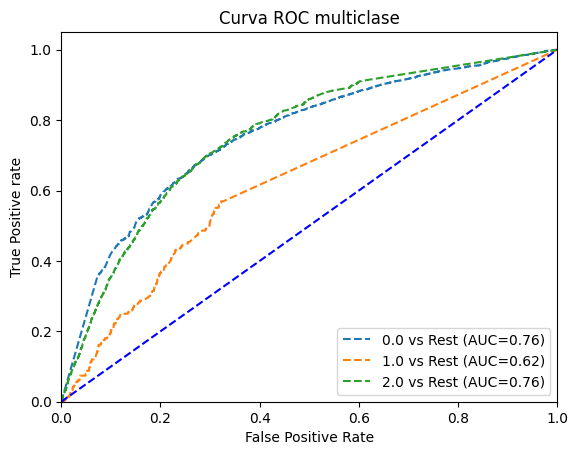

In [11]:
knn = KNeighborsClassifier()

# Se crean los modelos con diferentes conjuntos de características
models = [
    (knn, ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], 'Árbol de decisión'),
    (knn, ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'], 'Árbol de decisión'),
    (knn, ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'], 'Árbol de decisión'),
    (knn, ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'], 'Árbol de decisión')
]

evaluate_model(models, X_train, X_test, y_train, y_test, classes)



*   Redes neuronales


#######################################  Modelo: Árbol de decisión, Columnas: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9058752024934221
Matriz de confusión:
[[17245     0     2]
 [  216     0     0]
 [ 1378     0     1]]
Sensibilidad: 0.33353640032179577
Precisión: 0.416240541194095
Especificidad: 0.33353640032179577

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9068437321393985
Matriz de confusión:
[[17222     0    25]
 [  213     0     3]
 [ 1359     0    20]]
Sensibilidad: 0.33768457859339257
Precisión: 0.44434098352902224
Especificidad: 0.33768457859339257

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9078654048546079
Matriz de confusión:
[[17230     0    17]
 [  214     0     2]
 [ 1363     0    16]]
Sensibilidad: 0.33687231063954276
Precisión: 0.45776369993948557
Especificidad: 0.33687231063954276



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'] -------------------


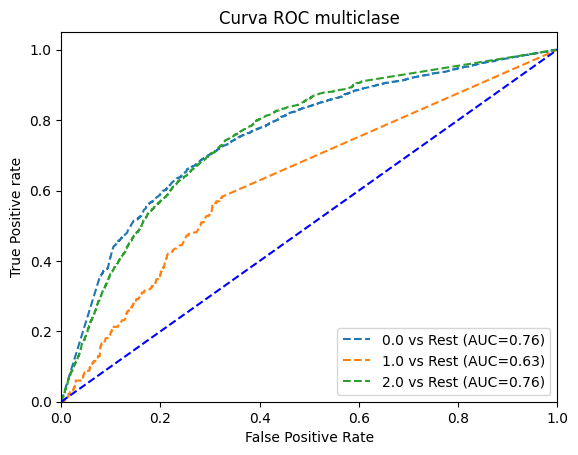

#######################################  Modelo: Árbol de decisión, Columnas: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9054372950745838
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9079582851604567
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9079715566853217
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'] -------------------


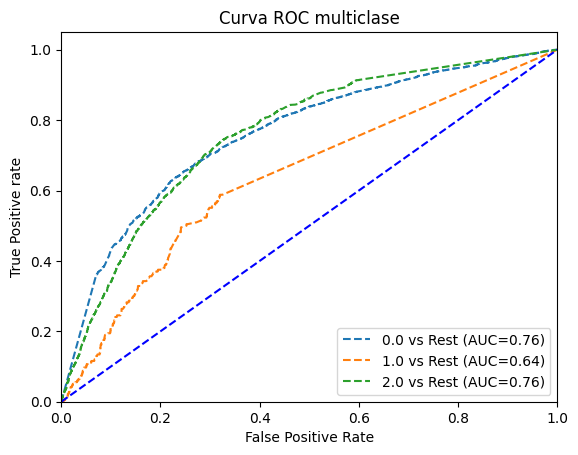

#######################################  Modelo: Árbol de decisión, Columnas: ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9079715538728352
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9079715537431068
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9079715566853217
Matriz de confusión:
[[17247     0     0]
 [  216     0     0]
 [ 1379     0     0]]
Sensibilidad: 0.3333333333333333
Precisión: 0.3051162296996073
Especificidad: 0.3333333333333333



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'] -------------------


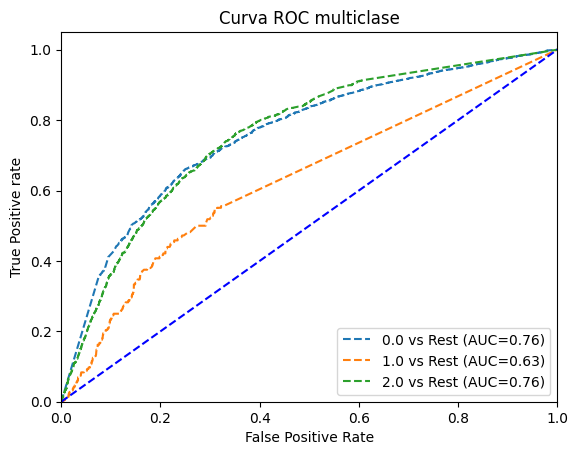

#######################################  Modelo: Árbol de decisión, Columnas: ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'] #############################
Validación cruzada con k=7
Precisión promedio: 0.9077857887857295
Matriz de confusión:
[[17213     0    34]
 [  212     0     4]
 [ 1343     0    36]]
Sensibilidad: 0.3413781721613673
Precisión: 0.4678775642650323
Especificidad: 0.3413781721613673

Validación cruzada con k=9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.90814404214894
Matriz de confusión:
[[17114     0   133]
 [  202     0    14]
 [ 1269     0   110]]
Sensibilidad: 0.35735215391090214
Precisión: 0.4496219040570422
Especificidad: 0.35735215391090214

Validación cruzada con k=11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precisión promedio: 0.9074276035954836
Matriz de confusión:
[[17217     0    30]
 [  214     0     2]
 [ 1351     0    28]]
Sensibilidad: 0.3395217118610196
Precisión: 0.46111406902589946
Especificidad: 0.3395217118610196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


------------------- Curva ROC para el modelo Árbol de decisión con columnas ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'] -------------------


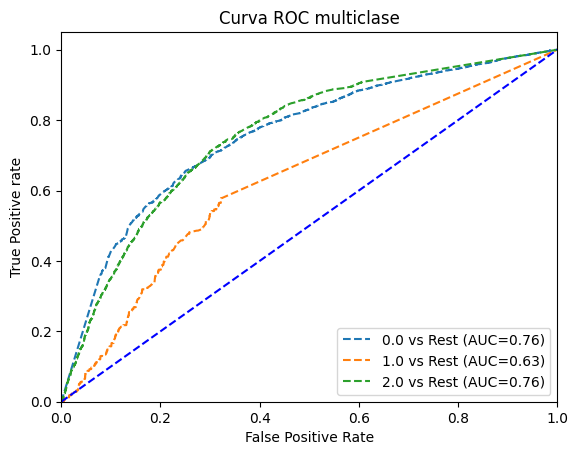

In [12]:
neural_network = MLPClassifier()

# Se crean los modelos con diferentes conjuntos de características
models = [
    (neural_network, ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], 'Árbol de decisión'),
    (neural_network, ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'], 'Árbol de decisión'),
    (neural_network, ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth'], 'Árbol de decisión'),
    (neural_network, ['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth'], 'Árbol de decisión')
]

evaluate_model(models, X_train, X_test, y_train, y_test, classes)

Basándonos en la información anterior podemos afirmar que el mejor modelo para el algoritmo árboles de decisión es el siguiente:
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

El mejor modelo para KNN es el siguiente:
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

Y el mejor modelo para redes neuronales es el siguiente:
['Sex', 'Age', 'PhysHlth', 'BMI', 'GenHlth', 'MentHlth']

# Fusionar por esquema de votación la salida de algoritmos clasificadores

In [13]:
from sklearn.ensemble import VotingClassifier
classifiers = [
    ('Decision Tree', decision_tree),
    ('KNN', knn),
    ('Neural Network', neural_network)
]

voting_classifier = VotingClassifier(classifiers, voting='hard')

voting_classifier.fit(X_train, y_train)

# Predecir las clases en el conjunto de prueba utilizando el clasificador de votación
y_pred = voting_classifier.predict(X_test)

# Evaluar la precisión del clasificador de votación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador de votación:", accuracy)

Precisión del clasificador de votación: 0.9113682199341896
